* Part 1: import libraries and data
* Part 2: EDA
* Part 3: Predict the cause of wildfire
* Part 4: Try to predict if the fire was caused knowingly

**Part 1**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from subprocess import check_output
conn = sqlite3.connect("capstone.sqlite")
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

The code below is sql connection.

In [2]:
data = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
print(data.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

The only columns we need are "FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE"

In [3]:
data = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)
print(data.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE  
0       0.10  
1       0.25  
2       0.10  
3       0.10  
4       0.10  


In [4]:
df= data[data.STAT_CAUSE_DESCR != 'Miscellaneous']

In [5]:
df= data[data.STAT_CAUSE_DESCR != 'Miscellaneous']

In [6]:
data = df

In [7]:
data.to_csv(r'C:\Users\gurma\Desktop\capstone\fires.csv', index = False)

The most weird part of this dataset is the date format which is in JUILIAN format , its been converted into Georgian so that it is generalized.

In [8]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(data.head()) #check the data

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  
1       0.25 2004-05-12  
2       0.10 2004-05-31  
3       0.10 2004-06-28  
4       0.10 2004-06-28  
5       0.10 2004-06-30  


In [9]:
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data['DAY_OF_WEEK'] = data['DATE'].dt.weekday_name
data_orig = data.copy()
print(data.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
1       0.25 2004-05-12      5   Wednesday  
2       0.10 2004-05-31      5      Monday  
3       0.10 2004-06-28      6      Monday  
4       0.10 2004-06-28      6      Monday  
5       0.10 2004-06-30      6   Wednesday  


In [10]:
data.to_csv(r'C:\Users\gurma\Desktop\capstone\Data_mod.csv', index = False)

**Part 2**

**Exploratory Data Analysis (EDA):**

Let us first start looking at the cause of fires

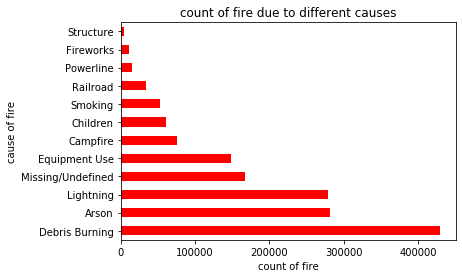

In [24]:
data['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red')
plt.title('count of fire due to different causes')
plt.xlabel('count of fire')
plt.ylabel('cause of fire')

plt.show()

So there are 13 causes of fire to be precise let us see if there is any unique pattern regarding the weekdays the fire is caused.

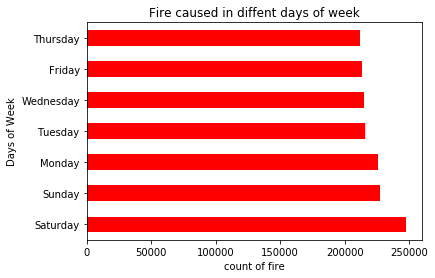

In [23]:
data['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title('Fire caused in diffent days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of Week')

plt.show()

    All the days of week look almost looks same. Let us see the top caused reason for Fire.

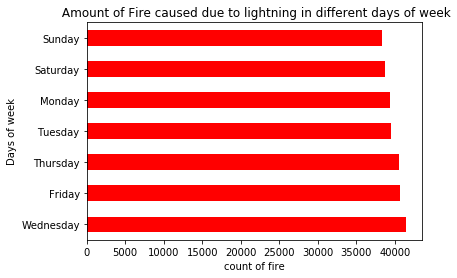

In [22]:
lightning = data[data['STAT_CAUSE_DESCR']=='Lightning']
lightning['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title(' Amount of Fire caused due to lightning in different days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of week')

plt.show()

    Due to lightning the pattern is different so maybe the increase of fire on weekends could be because of man caused fire.

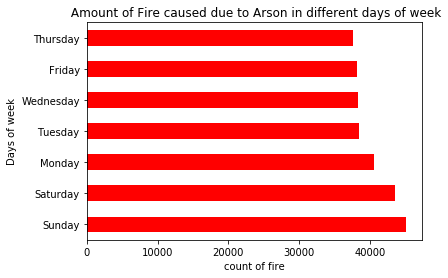

In [21]:
arson = data[data['STAT_CAUSE_DESCR']=='Arson']
arson['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title(' Amount of Fire caused due to Arson in different days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of week')
plt.show()

The ARSON(MAN CAUSED) fire shows a good information that most of them are on weekend that means it could be because of campfires or similar things.

Let us divide them by states now?

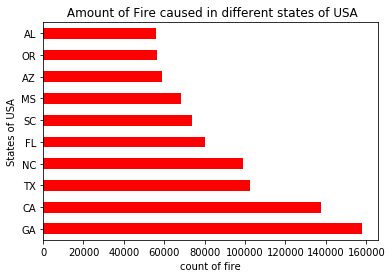

In [33]:
data['STATE'].value_counts().head(n=10).plot(kind='barh',color='red')
plt.title(' Amount of Fire caused in different states of USA')
plt.xlabel('count of fire')
plt.ylabel('States of USA')
plt.show()

plt.show()

Let us norrow down to top 3

In [26]:
CA = data[data['STATE']=='CA']
GA = data[data['STATE']=='GA']
TX = data[data['STATE']=='TX']

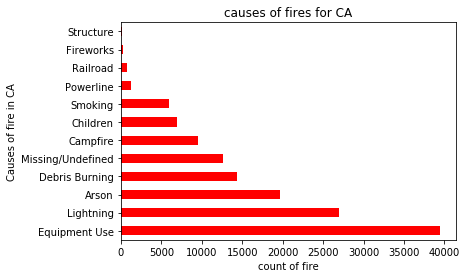

In [35]:
CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for CA')
plt.xlabel('count of fire')
plt.ylabel('Causes of fire in CA')
plt.show()
plt.show()

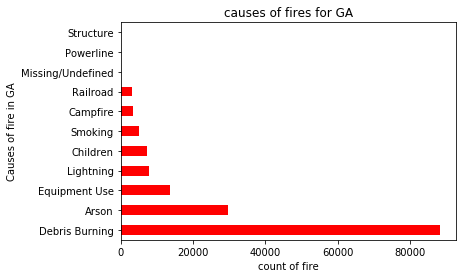

In [36]:
GA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for GA')
plt.xlabel('count of fire')
plt.ylabel('Causes of fire in GA')
plt.show()
plt.show()

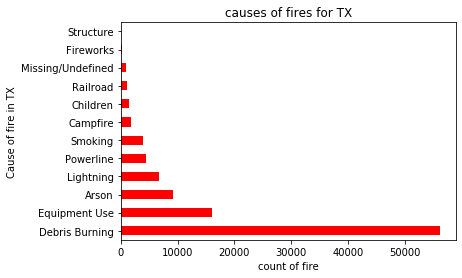

In [37]:
TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for TX')
plt.xlabel('count of fire')
plt.ylabel('Cause of fire in TX')
plt.show()
plt.show()

Let us create a rough map using scatter plot as we have the Latitude and Longitude

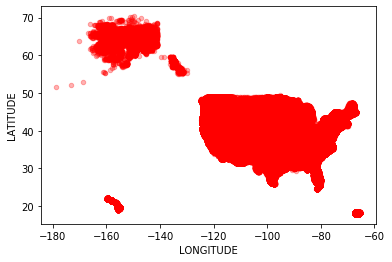

In [38]:
data.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='red',alpha=0.3)
plt.show()

There are lot of categories in this dataset so let us use One Hot Encoding to find the correlation between all these.

In [39]:
le = preprocessing.LabelEncoder()
data['STAT_CAUSE_DESCR'] = le.fit_transform(data['STAT_CAUSE_DESCR'])
data['STATE'] = le.fit_transform(data['STATE'])
data['DAY_OF_WEEK'] = le.fit_transform(data['DAY_OF_WEEK'])
print(data.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
1       2004                 6  38.933056 -120.404444      4       2453137.5   
2       2004                 3  38.984167 -120.735556      4       2453156.5   
3       2004                 6  38.559167 -119.913333      4       2453184.5   
4       2004                 6  38.559167 -119.933056      4       2453184.5   
5       2004                 6  38.635278 -120.103611      4       2453186.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
1       0.25 2004-05-12      5            6  
2       0.10 2004-05-31      5            1  
3       0.10 2004-06-28      6            1  
4       0.10 2004-06-28      6            1  
5       0.10 2004-06-30      6            6  


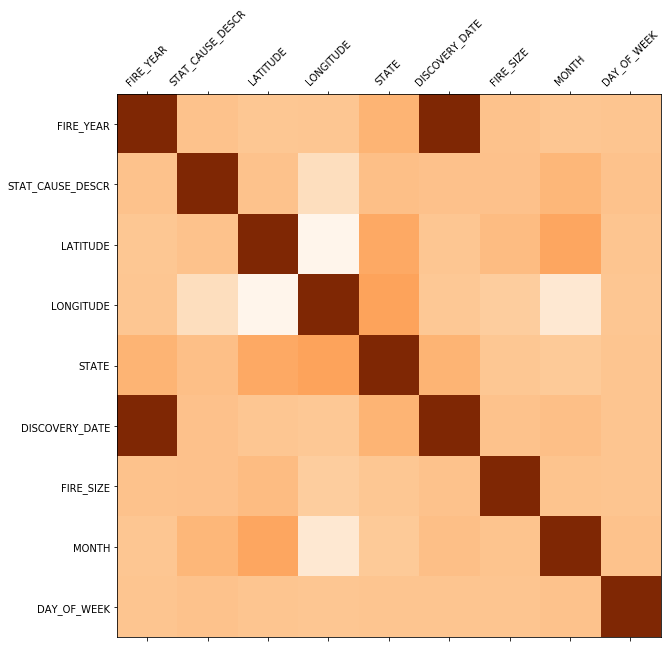

In [40]:
def plot_corr(data,size=10):
    corr = data.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(data)

Good correlation between month and latitude, weather and season are related, less correlation between longitude and month
& No Correlation of Target variable with any

**Part 3**

**Preparing the data for machine learning**

Dropping the Dates and NA's

In [41]:
data = data.drop('DATE',axis=1)
data = data.dropna()

Our Target variable is Cause of Fire(" STAT_CAUSE_DESCR ")

In [42]:
X = data.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = data['STAT_CAUSE_DESCR'].values

Logistic Regression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training

In [44]:
regr = linear_model.LinearRegression()

In [45]:
# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [47]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

Coefficients: 
 [ 4.29459478e-01 -4.14844828e-02 -3.51230750e-02  1.40890706e-02
 -1.17436742e-03  1.34066821e-05  6.70809748e-02  1.20218811e-02]
Mean squared error: 7.15
Coefficient of determination: 0.04


In [48]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
regr.score(X_train, y_train)

0.040805608787144565

In [50]:
regr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
regr.score(X_test, y_test)

0.0402288207350181

Decision Tree

In [52]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree.plot_tree(clf.fit(X_train,y_train))


AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [54]:
clf = tree.DecisionTreeRegressor(max_depth=35)

In [55]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=35, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
clf.score(X_train, y_train)

0.9773713118405919

In [57]:
clf.fit(X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=35, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
clf.score(X_test, y_test)

0.9882617072696446

Random Forest

In [59]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6322125576554932


Let us narrow down the classes as there are a lot of classes related to the cause of fire and wich could be tideous while predicting the cause of it.

In [60]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

data['LABEL'] = data_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original data earlier in the kernel
data = data.drop('STAT_CAUSE_DESCR',axis=1)
print(data.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   
5       2004  38.635278 -120.103611      4       2453186.5       0.10      6   

   DAY_OF_WEEK  LABEL  
1            6      1  
2            1      2  
3            1      1  
4            1      1  
5            6      1  


Let us try to predict the LABEL now.

In [61]:
X = data.drop(['LABEL'], axis=1).values
y = data['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7908363633248965


Reducing the Classes did turn out to be a good decision

In [62]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 68753  12417   1189    971]
 [ 10888 218342  17836   2467]
 [  1709  41256  40101   1089]
 [  2470   4833    478  42199]]


Accuracy and Confusion matrix simplified according to Label below

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

**Part 4**

Narrowing down to States

In [63]:
print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
1       0.25 2004-05-12      5   Wednesday  
2       0.10 2004-05-31      5      Monday  
3       0.10 2004-06-28      6      Monday  
4       0.10 2004-06-28      6      Monday  
5       0.10 2004-06-30      6   Wednesday  


Create a new field: ARSON

In [64]:
def set_arson_label(cause):
    arson = 0
    if cause == 'Arson':
        arson = 1
    return arson
     

CA['ARSON'] = CA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  ARSON  
1       0.25 2004-05-12      5   Wednesday      0  
2       0.10 2004-05-31      5      Monday      0  
3       0.10 2004-06-28      6      Monday      0  
4       0.10 2004-06-28      6      Monday      0  
5       0.10 2004-06-30      6   Wednesday      0  


C:\Users\gurma\AppData\Local\conda\conda\envs\DAB200\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can drop the DATE, STATE, FIRE_SIZE and STAT_CAUSE_DESCR fields and convert the DAY_OF_WEEK to numerical values.

In [65]:
le = preprocessing.LabelEncoder()
CA['DAY_OF_WEEK'] = le.fit_transform(CA['DAY_OF_WEEK'])

print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  ARSON  
1       0.25 2004-05-12      5            6      0  
2       0.10 2004-05-31      5            1      0  
3       0.10 2004-06-28      6            1      0  
4       0.10 2004-06-28      6            1      0  
5       0.10 2004-06-30      6            6      0  


C:\Users\gurma\AppData\Local\conda\conda\envs\DAB200\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# From Here 

In [66]:
data1 = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE FROM 'Fires'", conn)
print(data1.head())
data1_orig = data1.copy()

  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  FIRE_SIZE
0    Miscellaneous  40.036944 -121.005833    CA       0.10
1        Lightning  38.933056 -120.404444    CA       0.25
2   Debris Burning  38.984167 -120.735556    CA       0.10
3        Lightning  38.559167 -119.913333    CA       0.10
4        Lightning  38.559167 -119.933056    CA       0.10


In [67]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

data1['LABEL'] = data1_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original data earlier in the kernel
data1 = data1.drop('STAT_CAUSE_DESCR',axis=1)
print(data.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   
5       2004  38.635278 -120.103611      4       2453186.5       0.10      6   

   DAY_OF_WEEK  LABEL  
1            6      1  
2            1      2  
3            1      1  
4            1      1  
5            6      1  


In [68]:
le = preprocessing.LabelEncoder()
data1['STATE'] = le.fit_transform(data1['STATE'])

print(data1.head())

    LATITUDE   LONGITUDE  STATE  FIRE_SIZE  LABEL
0  40.036944 -121.005833      4       0.10      4
1  38.933056 -120.404444      4       0.25      1
2  38.984167 -120.735556      4       0.10      2
3  38.559167 -119.913333      4       0.10      1
4  38.559167 -119.933056      4       0.10      1


In [69]:


X = data1.drop(['LABEL'], axis=1).values
y = data1['LABEL'].values
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C= 10, gamma =0.1) 
svc.fit(Xx_train,yy_train)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

In [ ]:

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

We can now test the ML:

In [ ]:
X = CA.drop(['ARSON'], axis=1).values
y = CA['ARSON'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training
clf_rf = ske.RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

Summary:
Given some basic data, the kind of data available when a fire is first discovered, it is possible to predict with some accuracy if the firs wa the result of arson.